<a href="https://colab.research.google.com/github/MikelBarajas38/MachineLearning/blob/main/Ejercicio2_MB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Keras Workshop 2**

## Machine Learning
### Mikel Ignacio Barajas Martínez

Ingeniería en Sistemas Inteligentes, 2021, 336483, 202102300012 \
Machine Learning, 281601

### 03/20/24

𝝮

NOTE: The original workshop was taught in Spanish.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

from keras import models
from keras import layers
from keras import optimizers
from keras.models import load_model
from keras.utils import to_categorical

from pandas import DataFrame
import tensorflow as tf
import seaborn as sns

# Introducción a las Redes Convolucionales (ConvNets, CNNs)

__Objetivo:__
* En este ejercicio se implementará una red neuronal convolucional, incluyendo Dropout.

## Base de datos MNIST

En el ejemplo de la red Multicapa alcanzamos una predicción cercano al 98%, mientras que con una red convolucional, alcanzamos 99.1%. Veremos ahora si agregando Dropout, se mejora el desempeño de nuestra red.

In [ ]:
# cargar la interfaz a la base de datos que viene con Keras
from keras.datasets import mnist

# lectura de los datos
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Pre-procesamiento de los datos

In [ ]:
# reshape y normalización
train_images = train_images.reshape((-1, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((-1, 28, 28, 1))
test_images = test_images.astype('float32') / 255

data_shape = train_images.shape[1:]

# one-hot encoding
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

A continuación definimos una red neuronal convolucional (CNN).

__Ejercicio:__ Defina un modelo de red convolucional convNet, con tres capas convolucionales _Conv2D_. El número de filtros de esas capas es de su elección. Use un kernel_size = (3,3), y funciones de activación ReLU. (stride=1 y padding='valid')

Luego de cada capa convolucional, agregue una canpa Dropout, con una tasa de eliminación (rate) de 25%.

Añada capas convolucionales, capas _MaxPooling2D_. Use un pool_size = (2,2).

Posteriormente, agregue una capa _Flatten_ a la red convolucional \texttt{convnet} anterior. Luego, agregue una capa oculta _Dense_ con 64 neuronas, y una capa de salida _Dense_ con 10 neuronas. Use funciones de activación ReLU (y softmax en la capa de salida).

Asegúrese que las capas tienen nombres distintos, e incluya el parámetro input_shape en la primer capa.

In [ ]:
if 'convnet' in globals(): del convnet

# convnet = load_model('convnet_test1.h5')
# exit()

### START CODE HERE ### (≈ ? lines of code)
convnet = models.Sequential()

convnet.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=data_shape))
convnet.add(layers.Dropout(rate = 0.25))

convnet.add(layers.MaxPooling2D(pool_size=(2, 2)))

convnet.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
convnet.add(layers.Dropout(rate = 0.25))

convnet.add(layers.MaxPooling2D(pool_size=(2, 2)))

convnet.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
convnet.add(layers.Dropout(rate = 0.25))

convnet.add(layers.Flatten(data_format = None))
convnet.add(layers.Dense(units = 64, activation = 'relu'))
convnet.add(layers.Dense(units = 10, activation = 'softmax', name='class'))
### END CODE HERE ###

In [ ]:
convnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 dropout (Dropout)           (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                   

### Entrenamiento

__Ejercicio:__ Defina el optimizador, la función de pérdida y las métricas para su entrenamiento.
Posteriormente, entrene su red convolucional.

_Sugerencia_: use un pequeño número de iteraciones. Si ve que el tiempo de entrenamiento tardará demasiado, redefina su red neuronal (con menos filtros, o menos capas) o reduzca su conjunto de entrenamiento (tome una muestra de los datos de entrenamiento), e intente entrenar de nuevo.

In [ ]:
### START CODE HERE ### (≈ 2 lines of code)
opt = optimizers.Adam(learning_rate=0.001)
convnet.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
### END CODE HERE ###

### START CODE HERE ### (≈ 1 lines of code)
tic = time()
history = convnet.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.16666)
print('total training time:', time()-tic, 'seconds')
### END CODE HERE ###

Epoch 1/10
391/391 [==============================] - 60s 146ms/step - loss: 0.3837 - accuracy: 0.8795 - val_loss: 0.1205 - val_accuracy: 0.9720
Epoch 2/10
391/391 [==============================] - 44s 112ms/step - loss: 0.1091 - accuracy: 0.9655 - val_loss: 0.0763 - val_accuracy: 0.9821
Epoch 3/10
391/391 [==============================] - 46s 118ms/step - loss: 0.0806 - accuracy: 0.9745 - val_loss: 0.0594 - val_accuracy: 0.9867
Epoch 4/10
391/391 [==============================] - 43s 109ms/step - loss: 0.0654 - accuracy: 0.9798 - val_loss: 0.0604 - val_accuracy: 0.9860
Epoch 5/10
391/391 [==============================] - 52s 134ms/step - loss: 0.0565 - accuracy: 0.9823 - val_loss: 0.0503 - val_accuracy: 0.9874
Epoch 6/10
391/391 [==============================] - 43s 110ms/step - loss: 0.0515 - accuracy: 0.9834 - val_loss: 0.0485 - val_accuracy: 0.9884
Epoch 7/10
391/391 [==============================] - 46s 117ms/step - loss: 0.0481 - accuracy: 0.9844 - val_loss: 0.0420 - val_ac

### Ver el historial de desempeño de la red

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

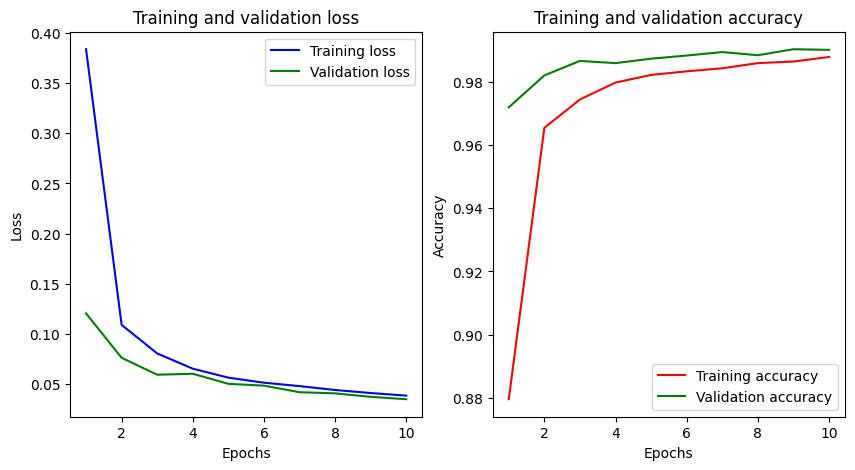

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

# figure
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Evaluando resultados

In [ ]:
results = convnet.evaluate(test_images, test_labels)
print('test loss:', results[0])
print('test accuracy:', results[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.0283 - accuracy: 0.9923
test loss: 0.028297118842601776
test accuracy: 0.9922999739646912


### Resultados

In [ ]:
pred = convnet.predict(test_images)
predictions = np.argmax(pred, 1)

313/313 [==============================] - 2s 7ms/step


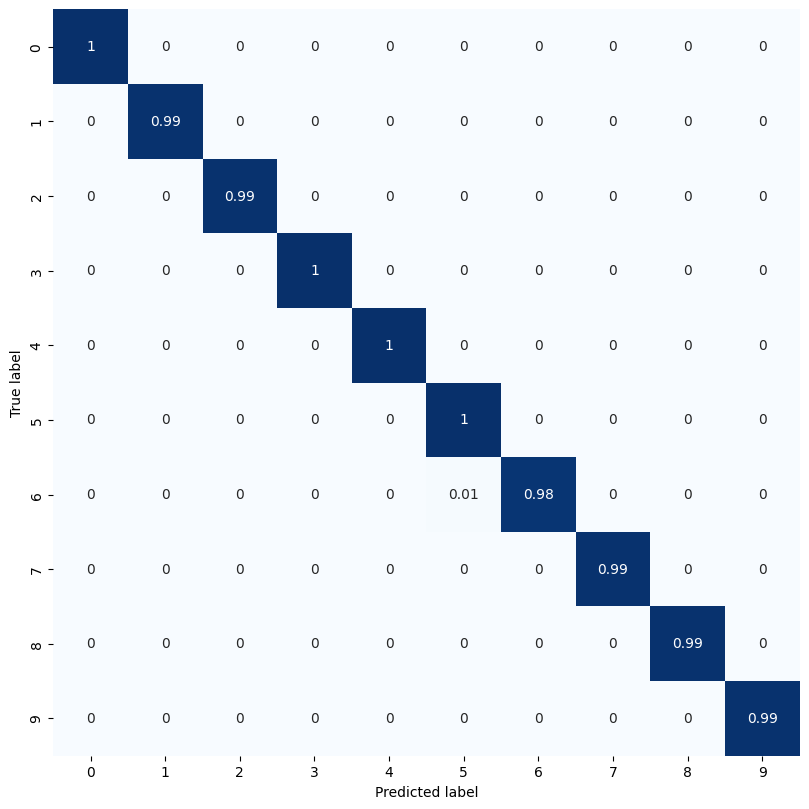

In [ ]:
test_labs = np.argmax(test_labels, 1)

# plot confusion matrix
conf_matrix = tf.math.confusion_matrix(labels=test_labs, predictions=predictions).numpy()
conf_matrix = np.around(conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis], decimals=2)

cf = DataFrame(conf_matrix)

# plot confusion matrix
cf = DataFrame(conf_matrix)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(cf, annot=True,cmap=plt.cm.Blues,cbar=False)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# save model
convnet.save('convnet_test1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


__Ejercicio:__ Repita el experimento con otros modelos diferentes.

Pruebe cambiar el número de filtros de las capas convolucionales, use kernel_size de otro tamaño, y funciones de activación distintas. Experimente qué sucede si cambia los parámetros de stride y padding.

Similarmente, experimente cambiando (o quitando) la tasa de Dropout. Experimente también con el parámetro pool_size en las capas de MaxPooling.

Puede probar otros optimizadores, u otras funciones de pérdida. Por último, compare sus diferentes modelos para determinar cuál tiene un mejor desempeño.

## Experimentos

### LeNet

In [ ]:
if 'lenet' in globals(): del lenet

lenet = models.Sequential()

lenet.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=data_shape, padding="same"))
lenet.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
lenet.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
lenet.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
lenet.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
lenet.add(layers.Flatten())
lenet.add(layers.Dense(84, activation='tanh'))
lenet.add(layers.Dense(10, activation='softmax'))

lenet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 27, 27, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 23, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 11, 11, 16)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 120)         48120     
                                                                 
 flatten_1 (Flatten)         (None, 5880)             

In [ ]:
opt = optimizers.Adam(learning_rate=0.001)
lenet.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

tic = time()
history = lenet.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.16666)
print('total training time:', time()-tic, 'seconds')

Epoch 1/10
391/391 [==============================] - 88s 222ms/step - loss: 0.2887 - accuracy: 0.9146 - val_loss: 0.1825 - val_accuracy: 0.9508
Epoch 2/10
391/391 [==============================] - 100s 256ms/step - loss: 0.1734 - accuracy: 0.9500 - val_loss: 0.1486 - val_accuracy: 0.9592
Epoch 3/10
391/391 [==============================] - 128s 329ms/step - loss: 0.1367 - accuracy: 0.9593 - val_loss: 0.1179 - val_accuracy: 0.9661
Epoch 4/10
391/391 [==============================] - 103s 264ms/step - loss: 0.1107 - accuracy: 0.9671 - val_loss: 0.0982 - val_accuracy: 0.9722
Epoch 5/10
391/391 [==============================] - 89s 228ms/step - loss: 0.0904 - accuracy: 0.9733 - val_loss: 0.0913 - val_accuracy: 0.9724
Epoch 6/10
391/391 [==============================] - 93s 238ms/step - loss: 0.0773 - accuracy: 0.9763 - val_loss: 0.0918 - val_accuracy: 0.9736
Epoch 7/10
391/391 [==============================] - 78s 199ms/step - loss: 0.0699 - accuracy: 0.9792 - val_loss: 0.0769 - val

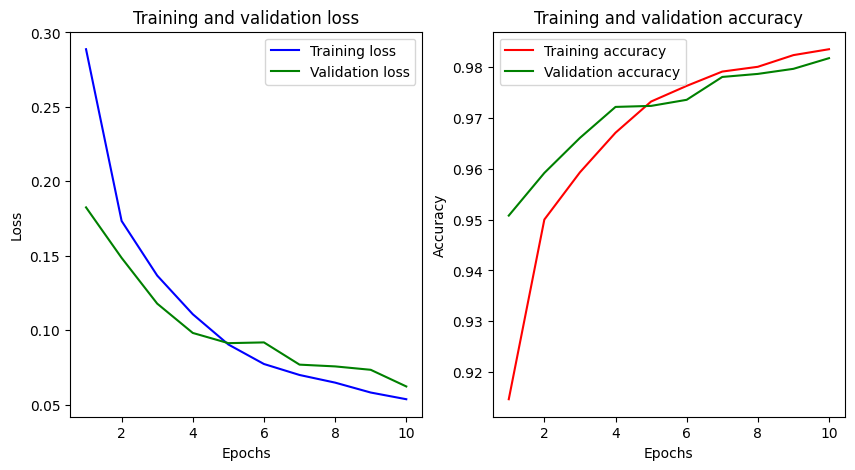

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

# figure
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
results = lenet.evaluate(test_images, test_labels)
print('test loss:', results[0])
print('test accuracy:', results[1])

313/313 [==============================] - 5s 17ms/step - loss: 0.0583 - accuracy: 0.9817
test loss: 0.05832364410161972
test accuracy: 0.9817000031471252


In [ ]:
pred = lenet.predict(test_images)
predictions = np.argmax(pred, 1)

313/313 [==============================] - 7s 21ms/step


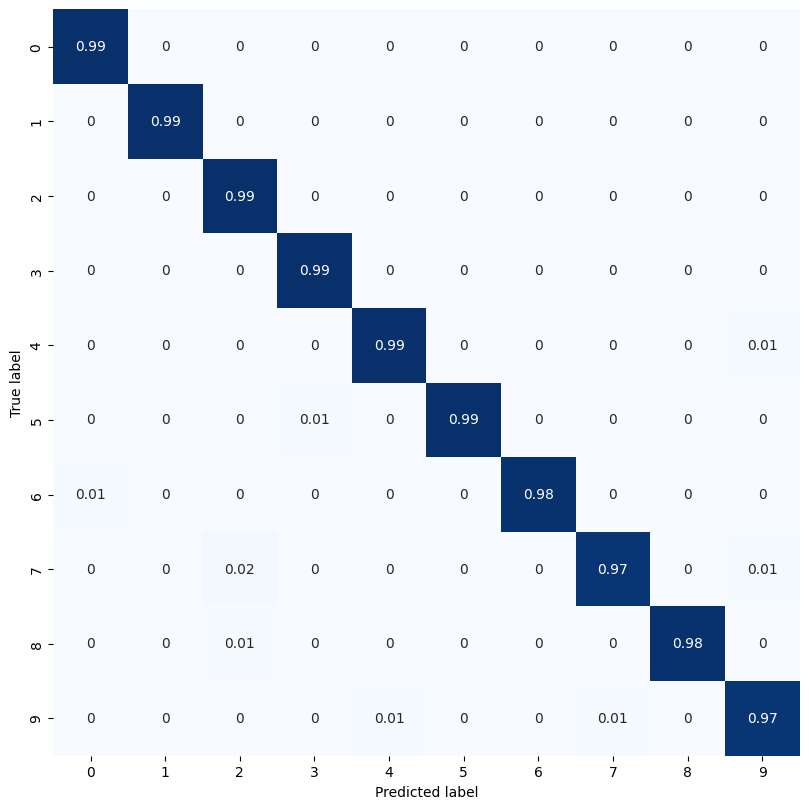

In [ ]:
test_labs = np.argmax(test_labels, 1)

# plot confusion matrix
conf_matrix = tf.math.confusion_matrix(labels=test_labs, predictions=predictions).numpy()
conf_matrix = np.around(conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis], decimals=2)

cf = DataFrame(conf_matrix)

# plot confusion matrix
cf = DataFrame(conf_matrix)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(cf, annot=True,cmap=plt.cm.Blues,cbar=False)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
lenet.save('lenet.h5')

### MinNet

In [ ]:
if 'minnet' in globals(): del minnet

minnet = models.Sequential()

minnet.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=data_shape))
minnet.add(layers.Dropout(rate = 0.25))

minnet.add(layers.MaxPooling2D(pool_size=(2, 2)))

minnet.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=data_shape))
minnet.add(layers.Dropout(rate = 0.25))

minnet.add(layers.Flatten())
minnet.add(layers.Dense(units = 128, activation = 'relu'))
minnet.add(layers.Dense(units = 10, activation = 'softmax', name='class'))

minnet.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 dropout_7 (Dropout)         (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 dropout_8 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 flatten_4 (Flatten)         (None, 7744)              0         
                                                      

In [ ]:
opt = optimizers.Adam(learning_rate=0.001)
minnet.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

tic = time()
history = minnet.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.16666)
print('total training time:', time()-tic, 'seconds')

Epoch 1/10
391/391 [==============================] - 61s 152ms/step - loss: 0.1747 - accuracy: 0.9462 - val_loss: 0.0675 - val_accuracy: 0.9826
Epoch 2/10
391/391 [==============================] - 60s 154ms/step - loss: 0.0533 - accuracy: 0.9834 - val_loss: 0.0490 - val_accuracy: 0.9882
Epoch 3/10
391/391 [==============================] - 58s 149ms/step - loss: 0.0350 - accuracy: 0.9888 - val_loss: 0.0468 - val_accuracy: 0.9871
Epoch 4/10
391/391 [==============================] - 59s 150ms/step - loss: 0.0257 - accuracy: 0.9914 - val_loss: 0.0432 - val_accuracy: 0.9881
Epoch 5/10
391/391 [==============================] - 58s 149ms/step - loss: 0.0197 - accuracy: 0.9936 - val_loss: 0.0378 - val_accuracy: 0.9895
Epoch 6/10
391/391 [==============================] - 68s 174ms/step - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0.0395 - val_accuracy: 0.9893
Epoch 7/10
391/391 [==============================] - 62s 159ms/step - loss: 0.0138 - accuracy: 0.9953 - val_loss: 0.0403 - val_ac

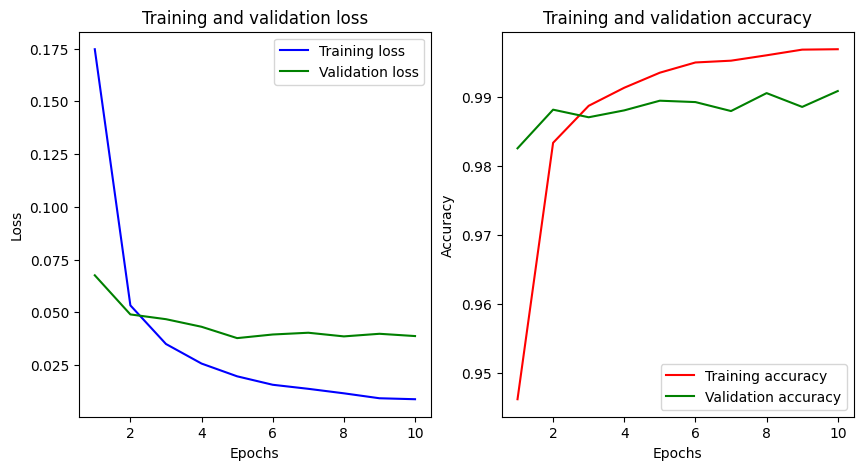

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

# figure
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
results = minnet.evaluate(test_images, test_labels)
print('test loss:', results[0])
print('test accuracy:', results[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.0277 - accuracy: 0.9913
test loss: 0.027713365852832794
test accuracy: 0.9912999868392944


In [ ]:
pred = minnet.predict(test_images)
predictions = np.argmax(pred, 1)

313/313 [==============================] - 3s 10ms/step


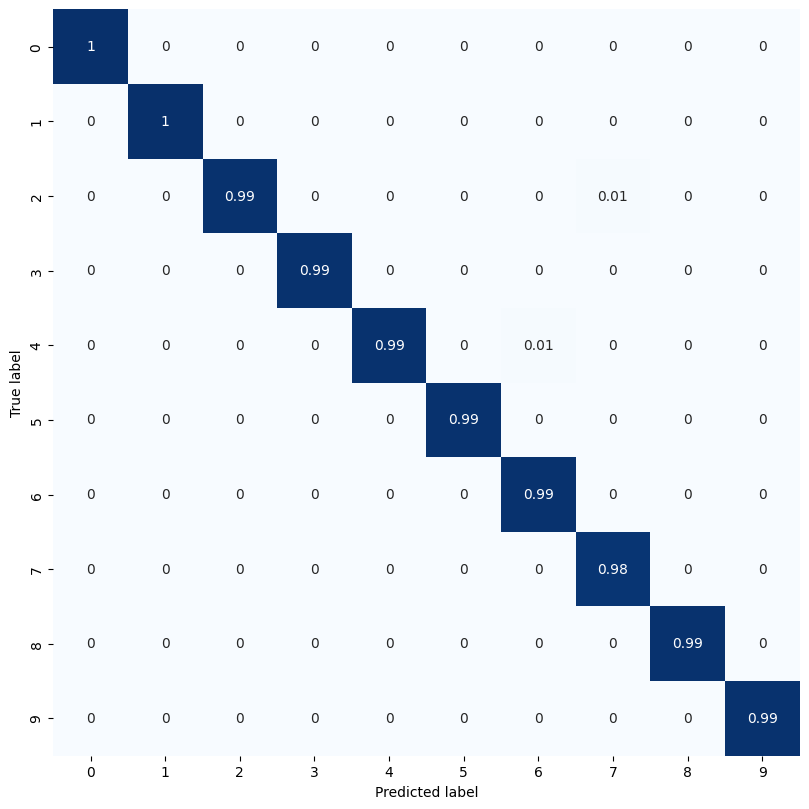

In [ ]:
test_labs = np.argmax(test_labels, 1)

# plot confusion matrix
conf_matrix = tf.math.confusion_matrix(labels=test_labs, predictions=predictions).numpy()
conf_matrix = np.around(conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis], decimals=2)

cf = DataFrame(conf_matrix)

# plot confusion matrix
cf = DataFrame(conf_matrix)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(cf, annot=True,cmap=plt.cm.Blues,cbar=False)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
minnet.save('minnet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Evaluation

In [ ]:
import os


all_files = os.listdir(os.getcwd())
weight_files = list(filter(lambda f: f.endswith('.h5'), all_files))

comp = []

for f in weight_files:
    name = f[:-3]
    model = load_model(f)
    results = model.evaluate(test_images, test_labels)
    comp.append({'name': name, 'accuracy': results[1], 'loss': results[0]})

df = DataFrame(comp, columns=['name', 'accuracy', 'loss'])

313/313 [==============================] - 3s 9ms/step - loss: 0.0277 - accuracy: 0.9913


In [ ]:
df

,name,accuracy,loss
0,convnet_test1,0.9923,0.028297
1,lenet,0.9817,0.058324
2,minnet,0.9913,0.027713


#Conclusions

Having access to such a powerful and complex tool for free and with such a simple API has kind of spoiled our generation of CS professionals. Most of us do not even realize the amount of work and extensive research background that got us to this point. Being able to, in just a few lines of code, start using what, in its moment, was groundbreaking and heavily restrictive technology is both a testament to human ingenuity and the alarming development rate of technology.